In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_log = pd.read_csv("transformedData/df_logStationary.csv")
df_log.head()

,Month,#Passengers
0,1949-12-01,-0.065494
1,1950-01-01,-0.093449
2,1950-02-01,-0.007566
3,1950-03-01,0.099416
4,1950-04-01,0.052142


In [3]:
df_log = df_log.set_index(['Month'])
df_log.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


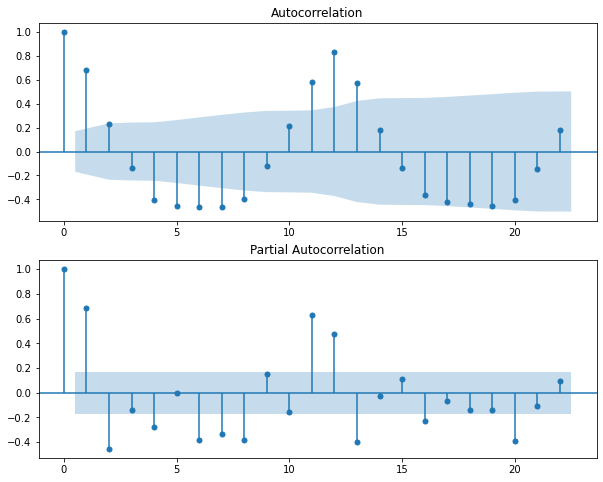

In [4]:
fig,ax = plt.subplots(2, figsize=(10,8))
ax[0] = plot_acf(df_log, ax=ax[0])
ax[1] = plot_pacf(df_log, ax=ax[1])

- ACF shuts off at lag 2, i.e. q = 1
- PACF shuts off at lag 2, i.e. p = 1

### Models for Exponential decay transformed series

#### AR model

Text(0.5, 1.0, 'RSS: 2.694060')

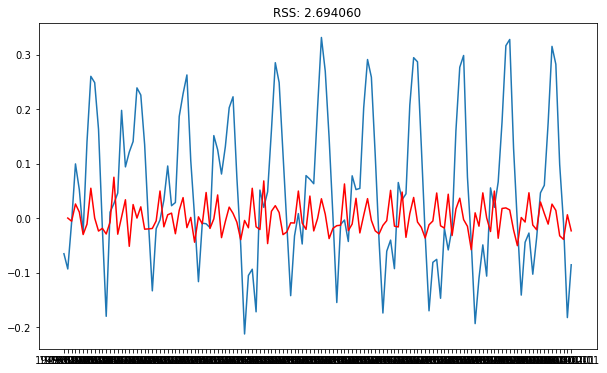

In [6]:
model = ARIMA(df_log, order=(2,1,0))
AR_results = model.fit(disp=-1)
plt.plot(df_log)
plt.plot(AR_results.fittedvalues, color='red')
error = (AR_results.fittedvalues-df_log['#Passengers']).dropna()
plt.title('RSS: %4f'%sum(error**2))

Text(0.5, 1.0, 'RSS: 4.879450')

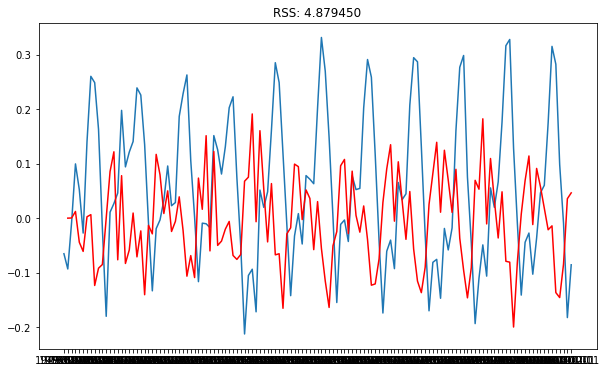

In [7]:
model = ARIMA(df_log, order=(0,1,2))
MA_results = model.fit(disp=-1)
plt.plot(df_log)
plt.plot(MA_results.fittedvalues, color='red')
error = (MA_results.fittedvalues-df_log['#Passengers']).dropna()
plt.title('RSS: %4f'%sum(error**2))

Text(0.5, 1.0, 'RSS: 3.805445')

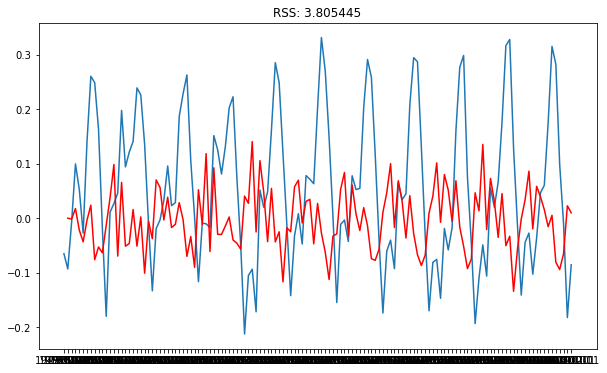

In [8]:
model = ARIMA(df_log, order=(2,1,2))
ARIMA_results = model.fit(disp=-1)
plt.plot(df_log)
plt.plot(ARIMA_results.fittedvalues, color='red')
error = (ARIMA_results.fittedvalues-df_log['#Passengers']).dropna()
plt.title('RSS: %4f'%sum(error**2))

In [ ]:
ARIMA_predictions = pd.Series(ARIMA_results.fittedvalues, copy=True)
ARIMA_predictions.head()